# PHYS 432 - Assignment 2, Question 3
Written by: Ruijia Yang, partly using codes given by prof. Lee<br>
Also see reference at the end for GIF code I took from the web.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio

In [28]:
dt = 0.1 ### Appropriate timestep
Nsteps = 120 ### Total number of steps

|  | $x=10$ | $x=12$ |
| --- | --- | --- |
| $y=12$ | Vortex (1) | Vortex (2) |
| $y=10$ | Vortex (3) | Vortex (4) |

In [18]:
## Setting up initial conditions (vortex centres and circulation) 
# Vortex rings
y_v = np.array([12,12,10,10]) ### insert the y−positions of the 4 vortices
x_v = np.array([10,12,10,12]) ### insert the x−positions of the 4 vortices
k_v = np.array([1,1,-1,-1]) ### insert the line vortex constant k of the 4 vortices

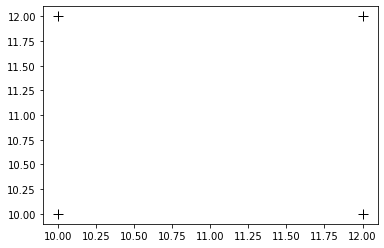

In [19]:
# Setting up the plot
plt.ion ()
fig, ax = plt.subplots(1,1)
# mark the initial positions of vortices
pp, = ax.plot(x_v, y_v, 'k+', markersize=10)
#play around with the marker size and type as you see fit

In [34]:
# draw the initial velocity streamline
ngrid = 2 ### insert the dimension of your simulation grid
#Y, X = np.mgrid[-ngrid: ngrid:50j, -ngrid:ngrid:50j]
Y, X = np.mgrid[8:14:180j, 8:44:180j]
#360j sets the resolution of the cartesian grid; play around with it as you see fit
vel_x = np.zeros(np.shape(X)) #this holds x-velocity 
vel_y = np.zeros(np.shape(Y)) #this holds y-velocity

In [21]:
# masking radius for better visualization of the vortex centres 
r_mask = 1 ### insert the radius of the mask around the vortex centres
#within this mask, you will not plot any streamline
#so that you can see more clearly the movement of the vortex centres

In [22]:
def vel_from_vortex(init_x, init_y, vort_x, vort_y, vort_k):
    ## Define a function that generates the advection velocity from the other vortices to the desired vortex.
    # Vortex position
    x_diff_vortices = vort_x - init_x
    y_diff_vortices = vort_y - init_y
    # Distance between 2 vortices
    distance_vortices = np.sqrt(x_diff_vortices**2 + y_diff_vortices**2)
    #print('distance',distance_vortices)
    vel_magnitude = vort_k/distance_vortices
    # Velocity in components
    vel_x = vel_magnitude*y_diff_vortices/distance_vortices
    vel_y = -1*vel_magnitude*x_diff_vortices/distance_vortices
    return (vel_x, vel_y)

In [23]:
def update_vortex_pos2(curr_vel_x, curr_vel_y, curr_k):
    ## Update the position of the vortex by adding (advection velocity * time step dt) to its original coordinate
    new_pos_x = [0]*len(curr_vel_x)
    new_pos_y = [0]*len(curr_vel_y)
    for i in range(len(curr_vel_x)):
        speed_x = 0
        speed_y = 0
        for j in range(len(curr_vel_x)):
            if j != i:
                speed_contrib_x = vel_from_vortex(curr_vel_x[i], curr_vel_y[i], curr_vel_x[j], 
                                                    curr_vel_y[j], curr_k[j])[0]
                speed_x += speed_contrib_x
                speed_contrib_y = vel_from_vortex(curr_vel_x[i], curr_vel_y[i], curr_vel_x[j], 
                                                    curr_vel_y[j], curr_k[j])[1]
                speed_y += speed_contrib_y
        new_pos_x[i] = curr_vel_x[i] + speed_x*dt
        new_pos_y[i] = curr_vel_y[i] + speed_y*dt
    # Directly plot the new position
    plt.plot(new_pos_x[0], new_pos_y[0], 'b*', markersize=10)
    plt.plot(new_pos_x[1], new_pos_y[1], 'r*', markersize=10)
    plt.plot(new_pos_x[2], new_pos_y[2], 'b*', markersize=10)
    plt.plot(new_pos_x[3], new_pos_y[3], 'r*', markersize=10)
    plt.xlim([8, 48])
    plt.ylim([9, 13])
    return (new_pos_x, new_pos_y)

In [59]:
def generate_vortex(grid_x, grid_y, x_pos, y_pos, vortex_k, masking_radius):
    # Gives the velocity field everywhere else.
    vel_x_out = np.zeros(np.shape(X))
    vel_y_out = np.zeros(np.shape(Y))
    for i in range(len(x_pos)): #looping over each vortex
        for p in range(len(grid_x)):
            for q in range(len(grid_x)):
                # velocity contributions by each vortex at visualization box position (p,q)
                vel_x_out[q][p] += vel_from_vortex(grid_x[p], grid_y[q], x_pos[i], y_pos[i], vortex_k[i])[0]
                vel_y_out[q][p] += vel_from_vortex(grid_x[p], grid_y[q], x_pos[i], y_pos[i], vortex_k[i])[1]
                distance_to_center = np.sqrt((x_pos[i] - p)**2 + (y_pos[i] - q)**2)
                if distance_to_center <= masking_radius:
                    # Mask near field the vortices to make them prominent
                    vel_x_out[p] = float('nan')
                    vel_y_out[p] = float('nan')
    return (vel_x_out, vel_y_out)

Since I couldn't figure out why is the animation method given in the sample code does not generate any plots, I went with a more tedious way where I generate the graph for each time step, then combine them into a GIF

In [60]:
# Initially, time 0
sample_streamplot_x, sample_streamplot_y = generate_vortex(X[0], Y[:,0], x_v, y_v, k_v, r_mask)

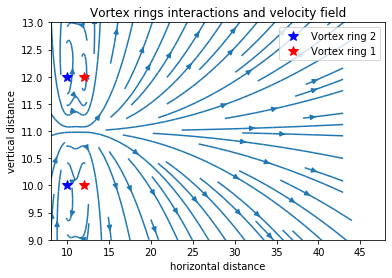

In [64]:
plt.plot(x_v[0], y_v[0], 'b*', markersize=10)
plt.plot(x_v[1], y_v[1], 'r*', markersize=10)
plt.plot(x_v[2], y_v[2], 'b*', markersize=10)
plt.plot(x_v[3], y_v[3], 'r*', markersize=10)
plt.streamplot(X, Y, sample_streamplot_x, sample_streamplot_y , density=[1, 1])
plt.xlim([8, 48])
plt.ylim([9, 13])
plt.title('Vortex rings interactions and velocity field')
plt.legend(['Vortex ring 2','Vortex ring 1'], loc='upper right')
plt.xlabel('horizontal distance')
plt.ylabel('vertical distance')
plt.savefig('anim_frame0.png')

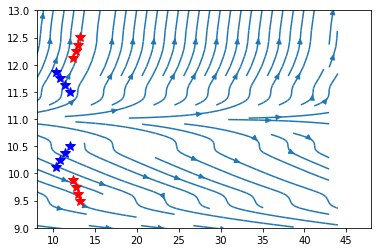

In [185]:
# Some test codes
#updatex1, updatey1 = update_vortex_pos2(x_v, y_v, k_v)
#updatex2, updatey2 = update_vortex_pos2(updatex1, updatey1, k_v)
#updatex3, updatey3 = update_vortex_pos2(updatex2, updatey2, k_v)
#updatex4, updatey4 = update_vortex_pos2(updatex3, updatey3, k_v)
#
#sample_streamplot_x2, sample_streamplot_y2 = generate_vortex(X[0], Y[:,0], updatex4, updatey4, k_v, r_mask)
#plt.streamplot(X, Y, sample_streamplot_x2, sample_streamplot_y2 , density=[1, 1])

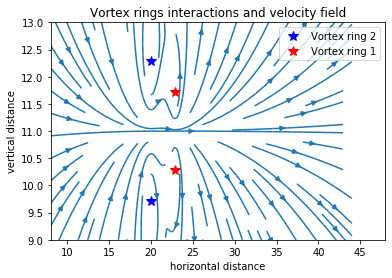

In [65]:
count = 0
# Iterating over time to advance the vortices in time.
curr_x_position = x_v
curr_y_position = y_v

while count < Nsteps:
    plt.clf()
    updated_x_position, updated_y_position = update_vortex_pos2(curr_x_position, curr_y_position, k_v)
    curr_x_position = updated_x_position
    curr_y_position = updated_y_position
    streamplot_x, streamplot_y = generate_vortex(X[0], Y[:,0], curr_x_position, curr_y_position, k_v, r_mask)
    plt.streamplot(X, Y, streamplot_x, streamplot_y , density=[1, 1])
    plt.title('Vortex rings interactions and velocity field')
    plt.legend(['Vortex ring 2','Vortex ring 1'], loc='upper right')
    plt.xlabel('horizontal distance')
    plt.ylabel('vertical distance')
    plt.savefig('anim_frame'+ str(count+1) +'.png')
    count += 1

In [66]:
# Build GIF and saving it as "anim_test_leapfrog.gif" 
with imageio.get_writer('anim_test_leapfrog.gif', mode='I') as writer:
    for filename in ['anim_frame'+ str(count) +'.png' for count in range(121)]:
        image = imageio.imread(filename)
        writer.append_data(image)

The above cell is taken from <br>
Carvalho, Thiago. _Basics of GIFs with Python’s Matplotlib_. Available at https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30 (Retrieved on February 9, 2022).
